In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.stats import boxcox

from imp import load_source


query_strings = load_source('query_strings', '../stats_generation/query_strings.py' )
gps = load_source(  'generate_player_stats', '../stats_generation/generate_player_stats.py' )

In [75]:
%matplotlib inline
plt.style.use('dark_background')
from pylab import rcParams
rcParams['figure.figsize'] = 14, 10

In [28]:
all_team_data = pd.DataFrame()

# Get all the team data
# Can id by team, week, year
for year in range( 2009, 2017 ):
    new_frame = gps.generate_stats( 'Team', year )
    new_frame['year'] = year
    all_team_data = pd.concat( [all_team_data, new_frame], ignore_index=True )
    
all_team_data.head()

,team,week,def_fumb_forced,def_fumb_rec,def_frec_yds,def_frec_tds,def_fg_blk,def_xp_blk,def_punt_blk,def_int,...,def_tkl_loss_yds_avg,kickret_yds_avg,puntret_yds_avg,tds,score,opp_team,opp_score,home_flag,away_flag,year
0,ARI,1,0,1,0,0,0,0,0,0,...,0.0,20.666667,9.166667,1,16.0,SF,20.0,1,0,2009
1,ARI,2,4,2,18,0,1,0,0,1,...,0.0,25.500000,0.000000,4,31.0,JAC,17.0,0,1,2009
2,ARI,3,0,0,0,0,0,0,0,1,...,0.0,19.500000,2.166667,1,10.0,IND,31.0,1,0,2009
3,ARI,5,0,0,0,0,1,0,0,1,...,0.0,19.500000,0.285714,4,28.0,HOU,21.0,1,0,2009
4,ARI,6,1,1,0,0,0,0,0,1,...,0.0,17.000000,10.666667,3,27.0,SEA,3.0,0,1,2009


In [29]:
all_team_data.shape

(4096, 80)

In [30]:
# Null values are all due to events not occuring
# No kickoffs or punt returns
# No defensive tackle losses
# No missed field goals
all_team_data.isnull().sum().sort_values( ascending=False ).head()

fg_miss_yds_min         2994
kickret_yds_avg          374
def_tkl_loss_yds_avg      60
puntret_yds_avg            7
year                       0
dtype: int64

In [48]:
lumped_year_team_data = all_team_data.groupby( ['team','year'] ).sum()

In [12]:
all_team_data[ def_cols ].corr()

,def_fumb_forced,def_fumb_rec,def_frec_yds,def_frec_tds,def_fg_blk,def_xp_blk,def_punt_blk,def_int,def_int_yds,def_int_tds,...,def_pass_def,def_qbhit,def_sack,def_sack_yds,def_safety,def_tkl,def_tkl_contributers,def_tkl_loss,def_tkl_loss_yds,def_tkl_loss_yds_avg
def_fumb_forced,1.000000,0.670567,0.245270,0.186681,-0.025758,0.021582,0.010986,0.054154,0.055762,0.038500,...,0.068883,0.034592,0.188727,-0.168754,0.014571,-0.003268,0.090518,0.032756,-0.010316,-0.010252
def_fumb_rec,0.670567,1.000000,0.359653,0.290652,-0.009703,0.019238,0.006206,0.054729,0.050951,0.029690,...,0.076322,0.015028,0.092385,-0.082908,-0.008097,0.006205,0.017909,-0.045250,-0.019229,-0.003148
def_frec_yds,0.245270,0.359653,1.000000,0.560752,-0.005720,-0.006061,0.055639,-0.009878,0.013202,0.004280,...,0.001455,0.036510,0.019645,-0.038629,-0.012200,0.008513,0.059841,-0.027340,0.005854,0.009958
def_frec_tds,0.186681,0.290652,0.560752,1.000000,-0.008491,0.019333,0.027865,0.027146,0.031818,0.030573,...,0.016304,0.031717,0.043203,-0.051934,-0.017248,-0.007437,0.025903,-0.002716,-0.011047,-0.006646
def_fg_blk,-0.025758,-0.009703,-0.005720,-0.008491,1.000000,0.000345,0.016649,-0.021564,-0.021297,-0.009140,...,-0.012739,-0.013255,-0.020857,0.033466,0.000491,-0.026908,0.077543,-0.023463,-0.020908,-0.007820
def_xp_blk,0.021582,0.019238,-0.006061,0.019333,0.000345,1.000000,-0.016337,-0.015477,-0.011757,-0.021599,...,-0.004734,-0.014464,-0.044659,0.032994,-0.016870,0.067561,0.003216,-0.028513,-0.026880,-0.020993
def_punt_blk,0.010986,0.006206,0.055639,0.027865,0.016649,-0.016337,1.000000,0.002514,0.006660,-0.002112,...,0.014883,-0.011423,0.020488,-0.002957,0.061155,-0.012147,0.025191,0.043798,0.086890,0.085725
def_int,0.054154,0.054729,-0.009878,0.027146,-0.021564,-0.015477,0.002514,1.000000,0.659743,0.401612,...,0.514946,0.101398,0.055652,-0.062307,-0.000481,-0.013565,-0.003580,0.002090,-0.019949,-0.023119
def_int_yds,0.055762,0.050951,0.013202,0.031818,-0.021297,-0.011757,0.006660,0.659743,1.000000,0.655729,...,0.368141,0.107029,0.066276,-0.063163,0.017302,-0.018084,0.042369,-0.012710,0.028114,0.027495
def_int_tds,0.038500,0.029690,0.004280,0.030573,-0.009140,-0.021599,-0.002112,0.401612,0.655729,1.000000,...,0.226625,0.080921,0.066067,-0.070068,-0.003159,-0.011761,0.029061,0.008711,0.044432,0.038278


In [10]:
all_team_data.columns.values

array([u'team', u'week', u'def_fumb_forced', u'def_fumb_rec',
       u'def_frec_yds', u'def_frec_tds', u'def_fg_blk', u'def_xp_blk',
       u'def_punt_blk', u'def_int', u'def_int_yds', u'def_int_tds',
       u'def_misc_yds', u'def_misc_tds', u'def_pass_def', u'def_qbhit',
       u'def_sack', u'def_sack_yds', u'def_safety', u'def_tkl',
       u'def_tkl_contributers', u'def_tkl_loss', u'def_tkl_loss_yds',
       u'off_fumb_forced', u'off_fumb_unforced', u'off_fumb_lost',
       u'off_fumb_rec', u'off_fumb_rec_tds', u'punts', u'punt_yds',
       u'punt_blk', u'punt_rets', u'punt_ret_yds', u'punt_ret_tds',
       u'kickoffs', u'kickoff_all_yds', u'kickoff_in_20',
       u'kickoff_own_recovery', u'kickoff_own_recovery_tds',
       u'kickoff_touchback', u'fg_att', u'fg_blk', u'fg_made', u'fg_miss',
       u'fg_yds', u'fg_yds_max', u'fg_miss_yds', u'fg_miss_yds_min',
       u'xp_att', u'xp_blk', u'xp_made', u'xp_miss', u'kickrets',
       u'kickret_yds', u'kickret_tds', u'kickret_touchback', 

In [24]:
def_cols = [ 'def_fumb_forced', u'def_fumb_rec',
       u'def_frec_yds', u'def_frec_tds', u'def_fg_blk', u'def_xp_blk',
       u'def_punt_blk', u'def_int', u'def_int_yds', u'def_int_tds',
       u'def_misc_yds', u'def_misc_tds', u'def_pass_def', u'def_qbhit',
       u'def_sack', u'def_sack_yds', u'def_safety', u'def_tkl',
       u'def_tkl_contributers', u'def_tkl_loss', u'def_tkl_loss_yds','def_tkl_loss_yds_avg'] 

pos_pred = ['opp_score','score']

In [31]:
all_team_data[ pos_pred+def_cols ].corr( method='spearman' ).sort_values( ['opp_score'] )

,opp_score,score,def_fumb_forced,def_fumb_rec,def_frec_yds,def_frec_tds,def_fg_blk,def_xp_blk,def_punt_blk,def_int,...,def_pass_def,def_qbhit,def_sack,def_sack_yds,def_safety,def_tkl,def_tkl_contributers,def_tkl_loss,def_tkl_loss_yds,def_tkl_loss_yds_avg
def_sack,-0.314723,0.169411,0.184602,0.110556,0.055237,0.061612,-0.010443,-0.035051,0.036656,0.079384,...,0.100626,0.607154,1.000000,-0.883642,0.085512,-0.051576,0.032201,0.545522,0.314444,0.217481
def_int,-0.305916,0.308611,0.056611,0.056489,0.053943,0.034902,-0.016008,-0.031795,-0.001166,1.000000,...,0.509022,0.139965,0.079384,-0.072298,0.008131,0.011625,-0.017412,0.002500,-0.023668,-0.008372
def_pass_def,-0.303273,0.289431,0.065019,0.068368,0.058259,0.055788,0.000377,-0.018615,0.004040,0.509022,...,1.000000,0.187860,0.100626,-0.111672,0.014895,0.007222,-0.030117,-0.000095,0.006957,0.018159
def_qbhit,-0.278731,0.192110,0.042510,0.014272,0.015031,0.026268,-0.010210,-0.004684,0.019334,0.139965,...,0.187860,1.000000,0.607154,-0.582042,0.050973,-0.047065,-0.018923,0.337085,0.252497,0.194555
def_int_yds,-0.231421,0.284495,0.058414,0.063084,0.064745,0.031453,-0.009753,-0.026938,0.008224,0.763459,...,0.399725,0.116101,0.078131,-0.066682,0.005290,0.003844,0.013671,0.007010,-0.008787,0.002226
def_tkl_loss,-0.161231,-0.000740,0.024551,-0.035904,-0.013979,0.002689,-0.010071,-0.038248,0.045402,0.002500,...,-0.000095,0.337085,0.545522,-0.480097,0.089962,0.035048,0.208315,1.000000,0.326856,0.034661
def_fumb_rec,-0.146296,0.168717,0.649306,1.000000,0.451281,0.270924,-0.018690,0.016792,-0.019092,0.056489,...,0.068368,0.014272,0.110556,-0.089352,-0.024676,0.020864,0.042599,-0.035904,-0.036745,-0.017300
def_fumb_forced,-0.142680,0.145161,1.000000,0.649306,0.334547,0.188653,-0.043948,0.016158,-0.005559,0.056611,...,0.065019,0.042510,0.184602,-0.161087,0.022438,0.019434,0.089861,0.024551,-0.017648,-0.015767
def_int_tds,-0.082352,0.248095,0.045378,0.048218,0.038872,0.038706,-0.014633,-0.020400,-0.000697,0.345957,...,0.200177,0.089078,0.063239,-0.058450,-0.001367,-0.000991,0.051344,0.020694,0.026403,0.021006
def_frec_yds,-0.081318,0.129989,0.334547,0.451281,1.000000,0.484439,-0.019127,0.019948,-0.019371,0.053943,...,0.058259,0.015031,0.055237,-0.059179,-0.026605,0.009599,0.033167,-0.013979,0.001669,0.007592


In [59]:
# Lots of correlation
# May chose to combine these
# Could potentially use PCA

tkl_stuff = [
                'def_sack','def_qbhit','def_pass_def','def_tkl','def_tkl_contributers',
                'def_tkl_loss','def_tkl_loss_yds','def_tkl_loss_yds_avg',
                'def_sack_yds'
            ]

print         all_team_data[tkl_stuff].corr( method='spearman' )
print lumped_year_team_data[tkl_stuff].corr( method='spearman' )

                      def_sack  def_qbhit  def_pass_def   def_tkl  \
def_sack              1.000000   0.607154      0.100626 -0.051576   
def_qbhit             0.607154   1.000000      0.187860 -0.047065   
def_pass_def          0.100626   0.187860      1.000000  0.007222   
def_tkl              -0.051576  -0.047065      0.007222  1.000000   
def_tkl_contributers  0.032201  -0.018923     -0.030117  0.385971   
def_tkl_loss          0.545522   0.337085     -0.000095  0.035048   
def_tkl_loss_yds      0.314444   0.252497      0.006957 -0.298953   
def_tkl_loss_yds_avg  0.217481   0.194555      0.018159 -0.332201   
def_sack_yds         -0.883642  -0.582042     -0.111672  0.038104   

                      def_tkl_contributers  def_tkl_loss  def_tkl_loss_yds  \
def_sack                          0.032201      0.545522          0.314444   
def_qbhit                        -0.018923      0.337085          0.252497   
def_pass_def                     -0.030117     -0.000095          0.006957 

In [54]:
# All the ways defense has to score is uncorrelated when grouped by team and year
# May chose to combine these

scored_stuff = ['def_int_tds','def_frec_tds','def_misc_tds','def_safety']
print lumped_year_team_data[scored_stuff].sum()
print lumped_year_team_data[scored_stuff].corr( method='spearman' )

def_int_tds     426
def_frec_tds    202
def_misc_tds     53
def_safety       96
dtype: int64
              def_int_tds  def_frec_tds  def_misc_tds  def_safety
def_int_tds      1.000000      0.119656      0.013840    0.040634
def_frec_tds     0.119656      1.000000     -0.004014   -0.000984
def_misc_tds     0.013840     -0.004014      1.000000   -0.012094
def_safety       0.040634     -0.000984     -0.012094    1.000000


In [55]:
# All the kicking blocks are uncorrelated
# May chose to combine these

blk_stuff = ['def_xp_blk','def_punt_blk','def_fg_blk',]

print all_team_data[blk_stuff].corr()

print lumped_year_team_data[blk_stuff].sum()
print lumped_year_team_data[blk_stuff].corr( method='spearman' )

              def_xp_blk  def_punt_blk  def_fg_blk
def_xp_blk      1.000000     -0.007470   -0.014749
def_punt_blk   -0.007470      1.000000    0.005674
def_fg_blk     -0.014749      0.005674    1.000000
def_xp_blk       62
def_punt_blk    106
def_fg_blk      164
dtype: int64
              def_xp_blk  def_punt_blk  def_fg_blk
def_xp_blk      1.000000     -0.045021    0.058342
def_punt_blk   -0.045021      1.000000   -0.016253
def_fg_blk      0.058342     -0.016253    1.000000


In [91]:
tkl_stuff = [u'def_pass_def', 
            u'def_qbhit', u'def_sack', u'def_sack_yds', 
            u'def_tkl', u'def_tkl_contributers', u'def_tkl_loss']

print all_team_data[tkl_stuff].corr()

print lumped_year_team_data[tkl_stuff].sum()
print lumped_year_team_data[tkl_stuff].corr( method='spearman' )

                      def_pass_def  def_qbhit  def_sack  def_sack_yds  \
def_pass_def              1.000000   0.189989  0.091659     -0.106570   
def_qbhit                 0.189989   1.000000  0.627087     -0.597619   
def_sack                  0.091659   0.627087  1.000000     -0.872518   
def_sack_yds             -0.106570  -0.597619 -0.872518      1.000000   
def_tkl                   0.000573  -0.060337 -0.071399      0.064895   
def_tkl_contributers     -0.021528  -0.018830  0.036649     -0.000480   
def_tkl_loss             -0.000721   0.350299  0.569685     -0.484449   

                       def_tkl  def_tkl_contributers  def_tkl_loss  
def_pass_def          0.000573             -0.021528     -0.000721  
def_qbhit            -0.060337             -0.018830      0.350299  
def_sack             -0.071399              0.036649      0.569685  
def_sack_yds          0.064895             -0.000480     -0.484449  
def_tkl               1.000000              0.422950      0.015771  
d

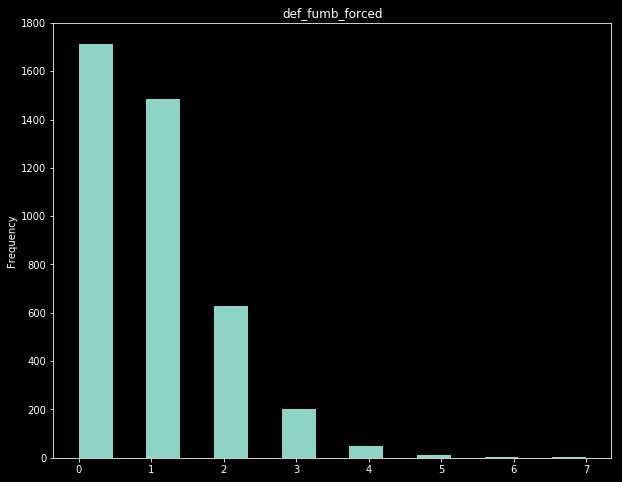

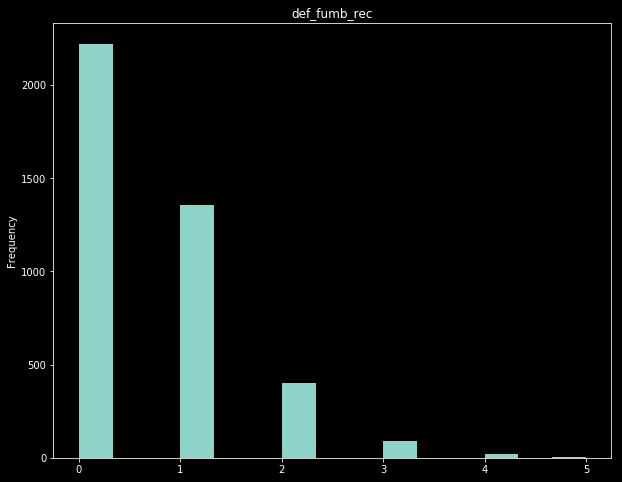

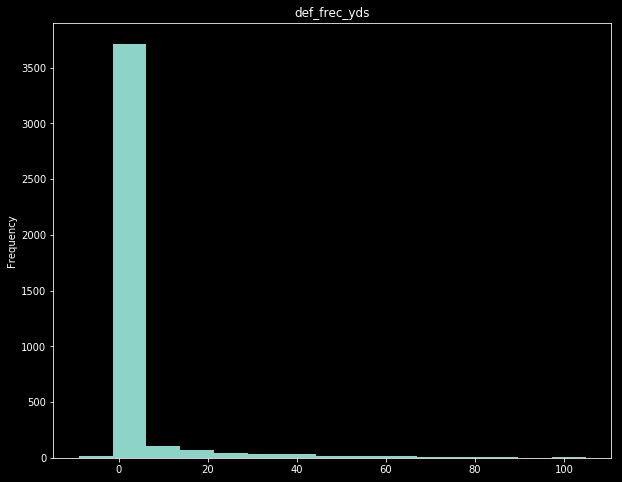

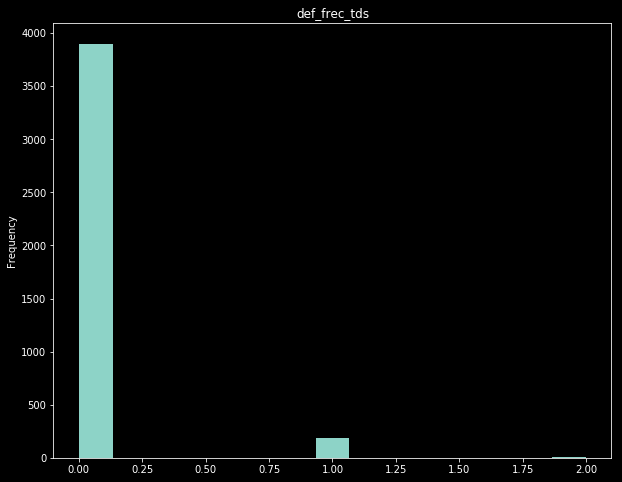

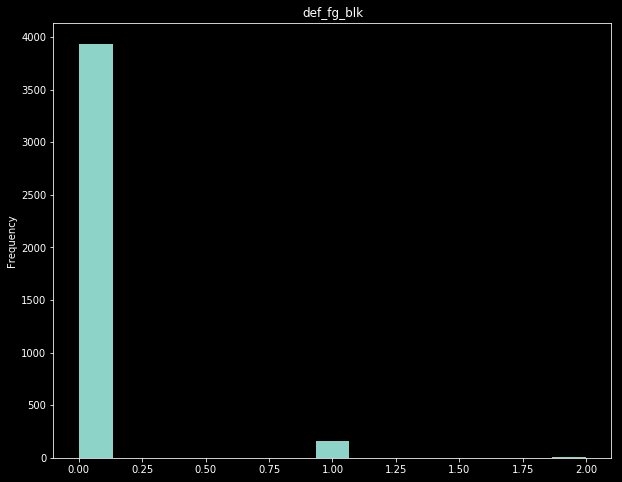

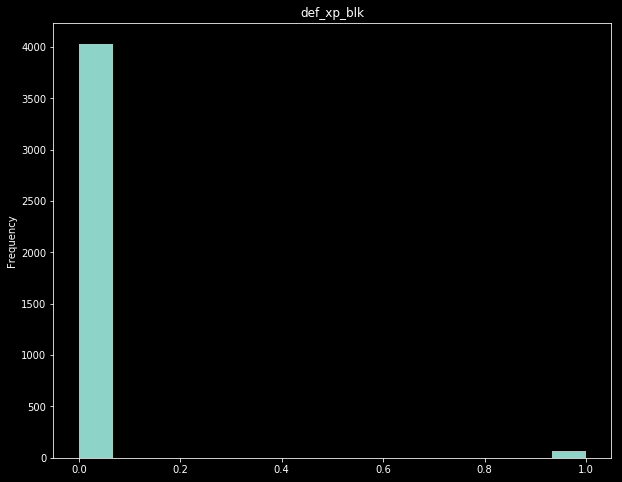

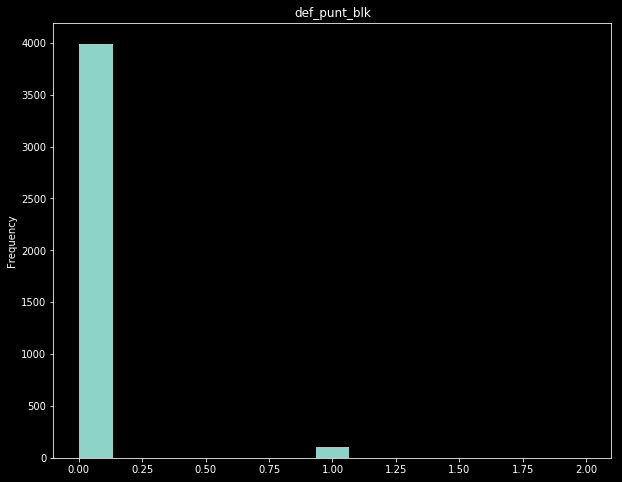

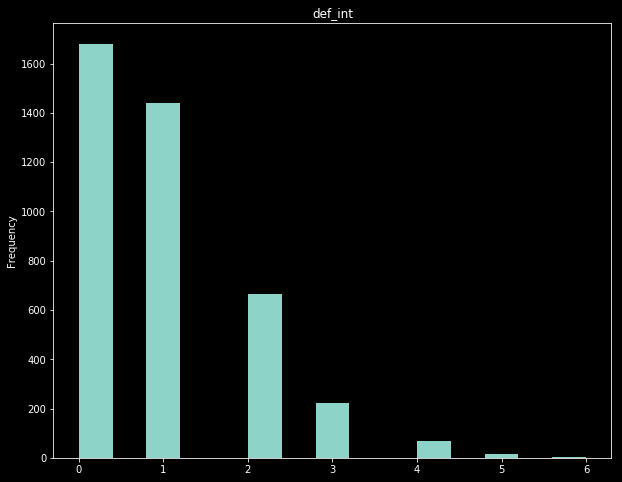

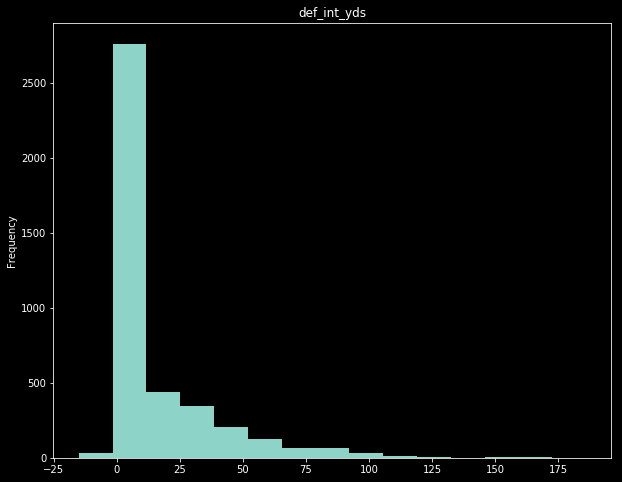

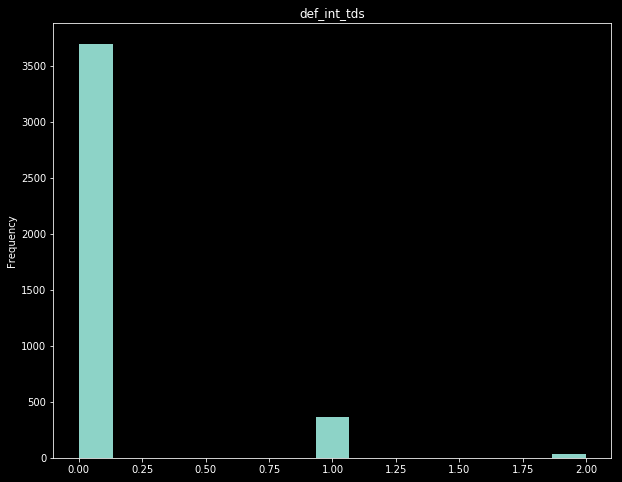

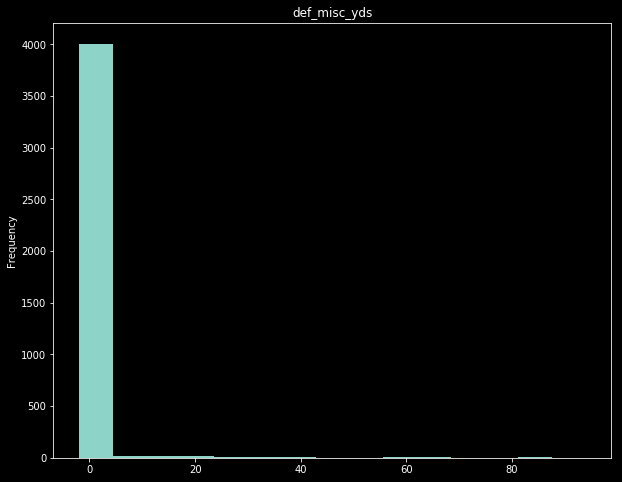

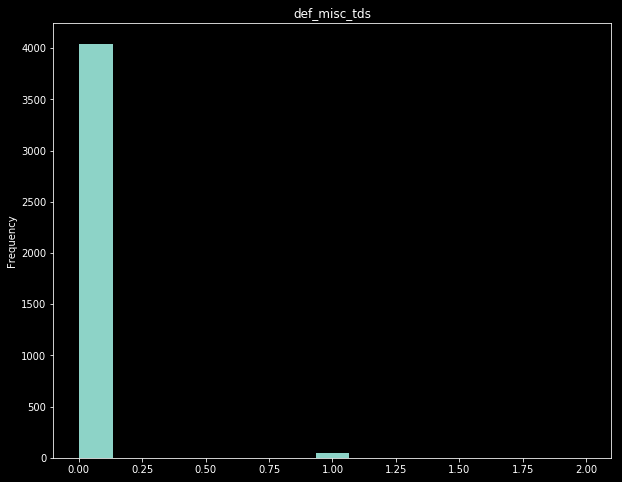

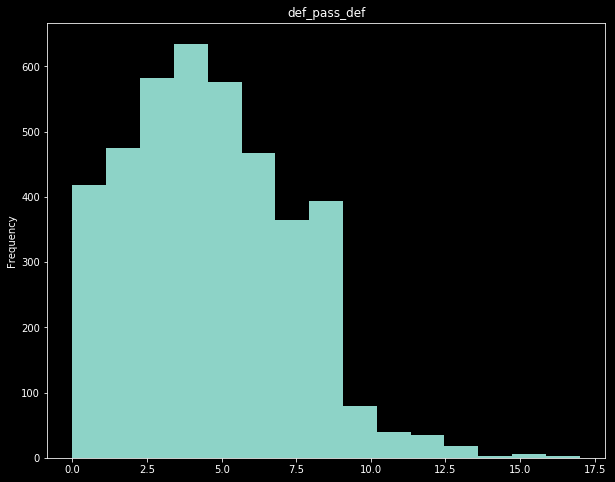

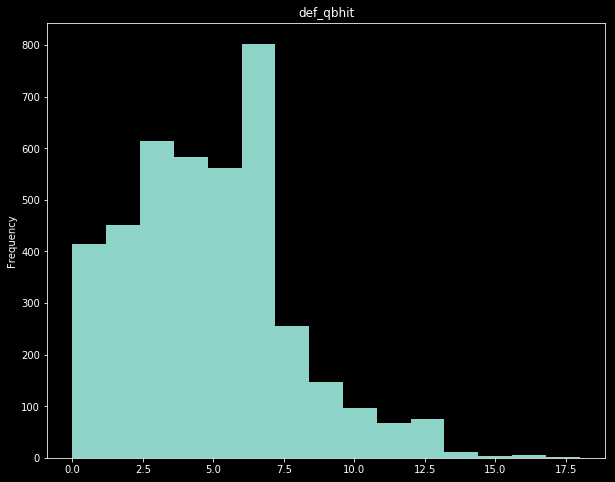

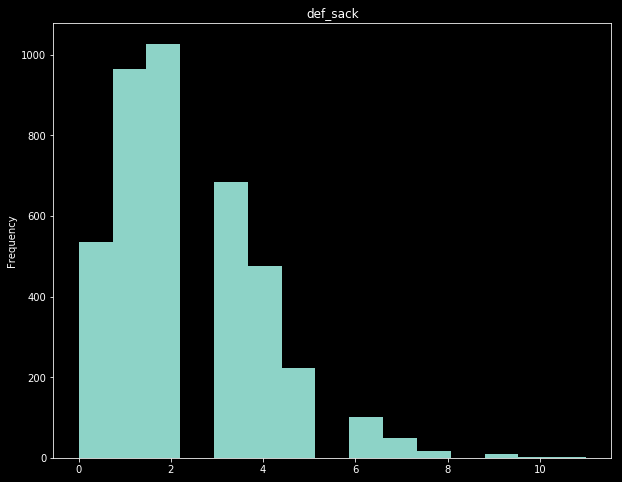

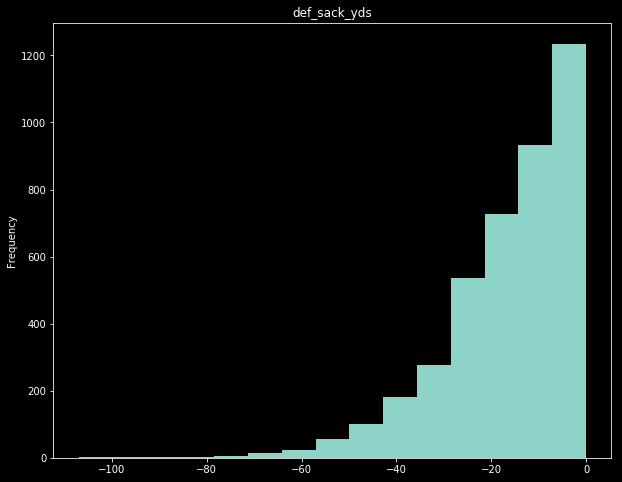

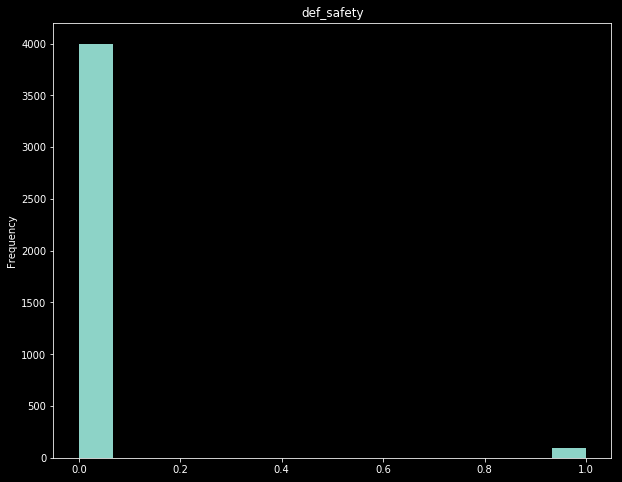

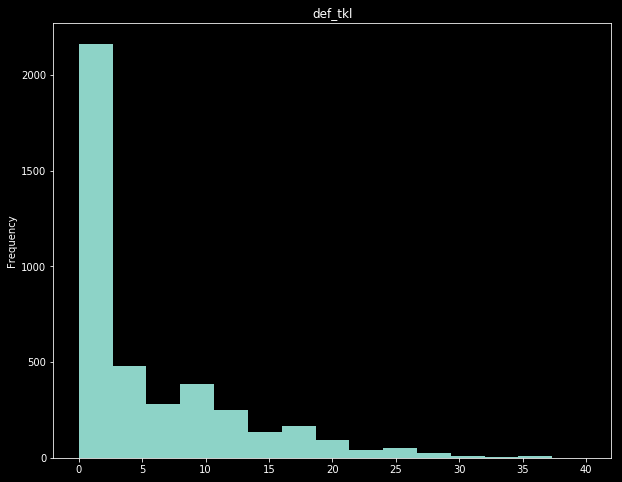

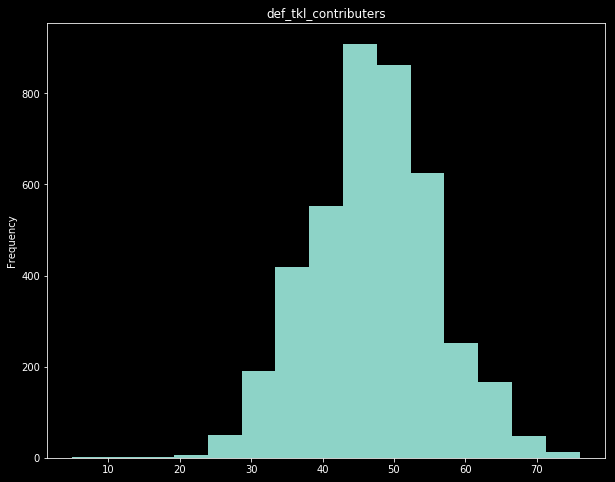

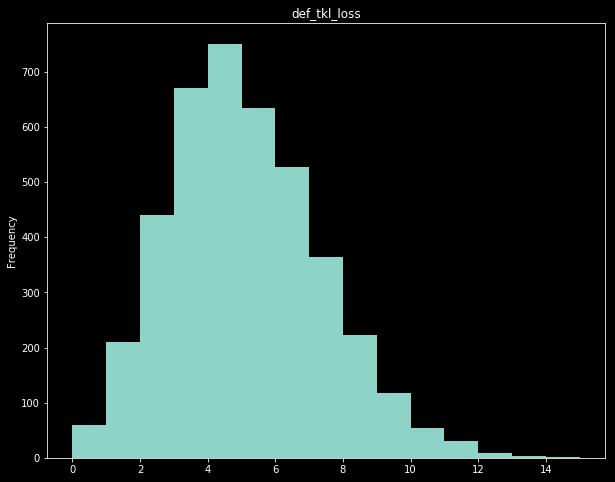

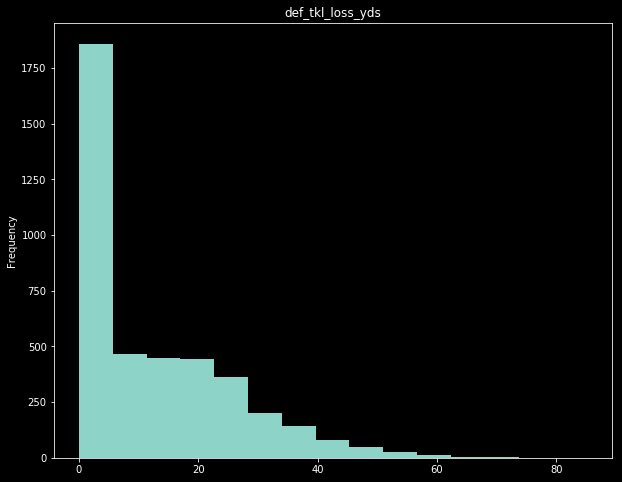

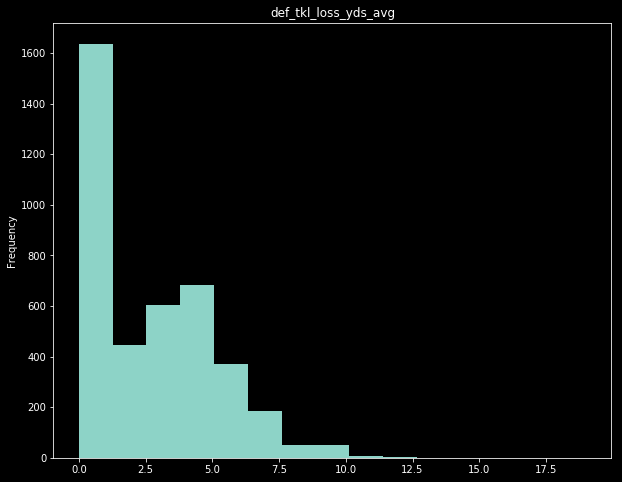

In [85]:
rcParams['figure.figsize'] = 10, 8
for col in def_cols:
    all_team_data[col].plot.hist( bins=15, title=col )
    plt.show()

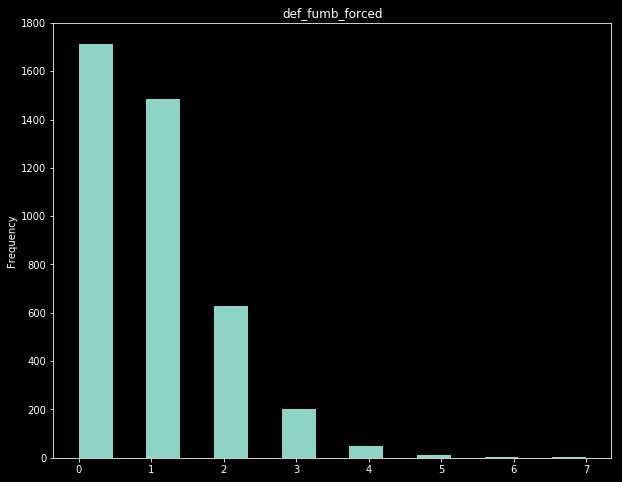

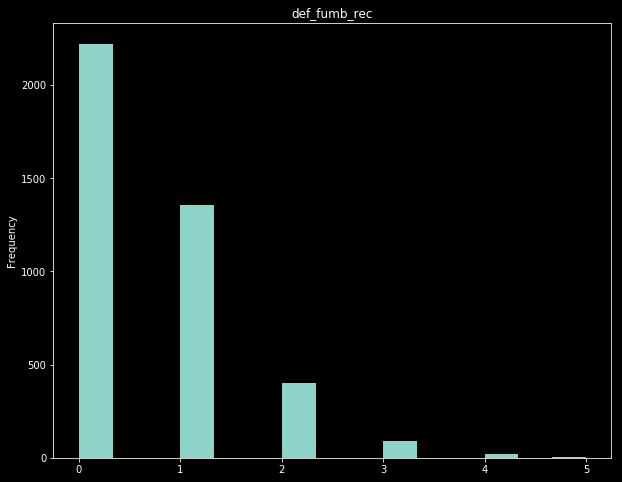

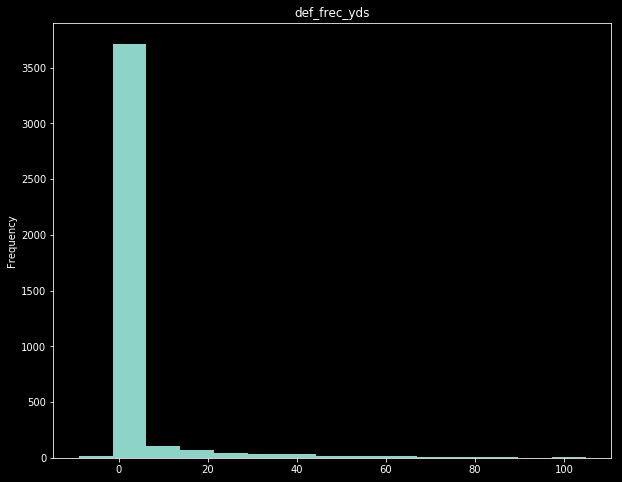

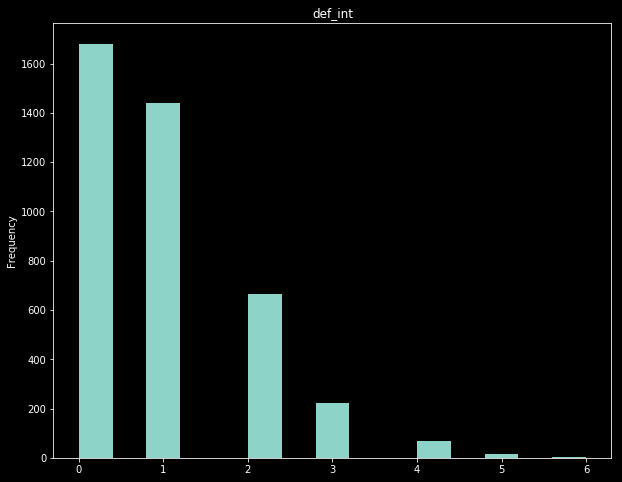

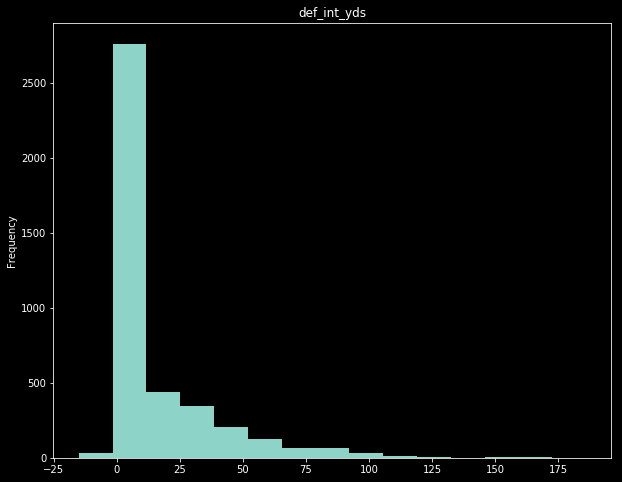

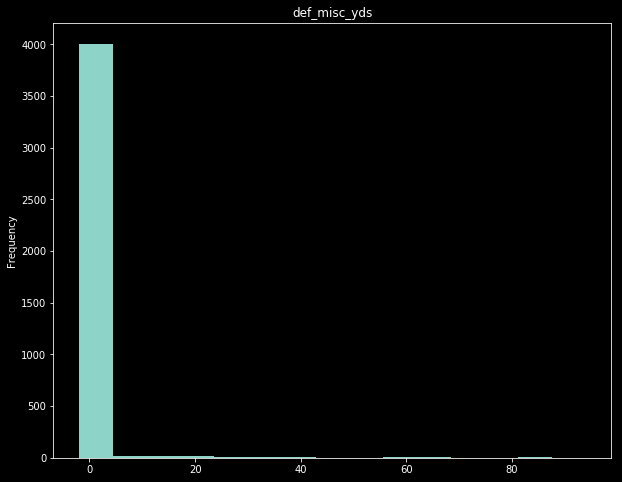

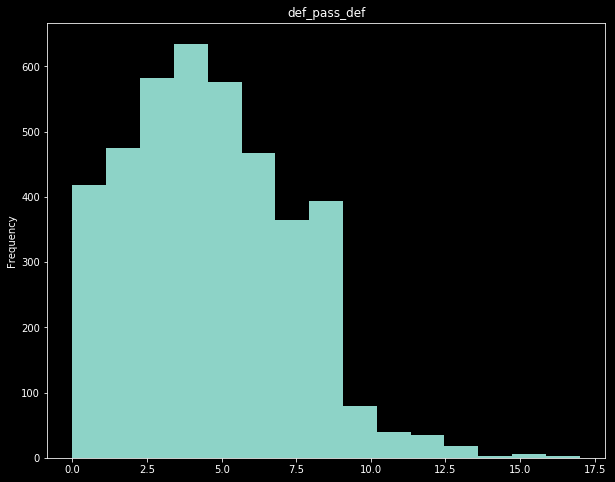

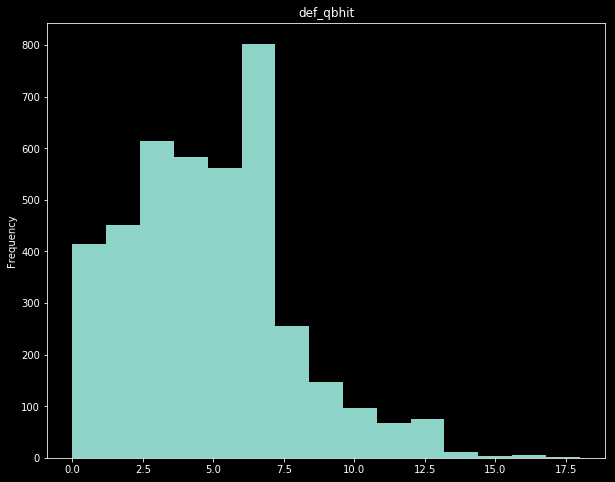

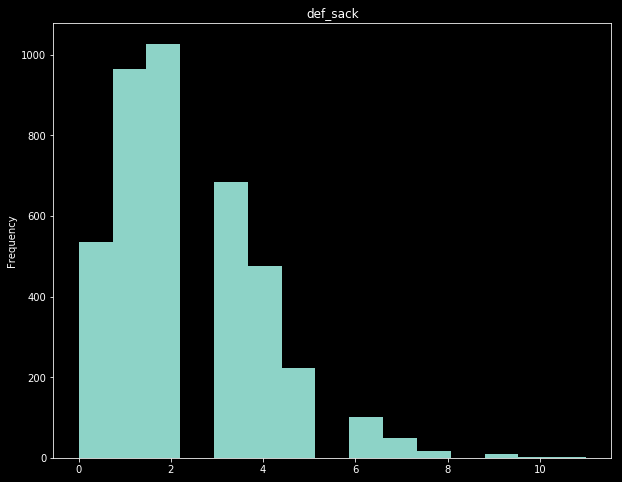

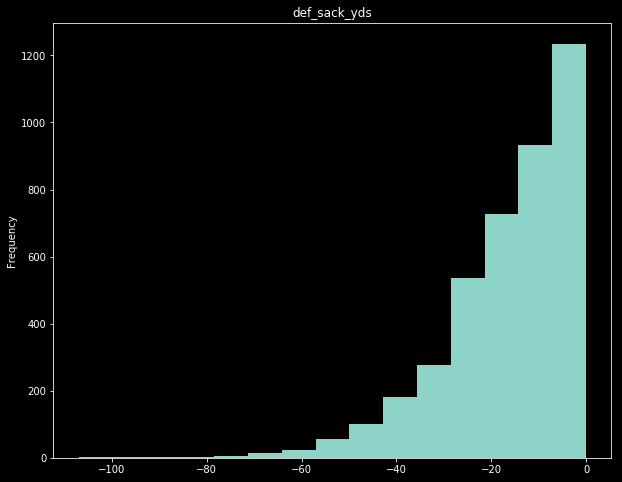

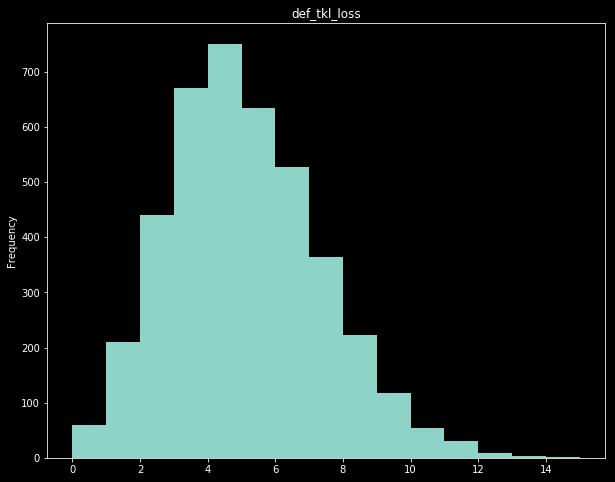

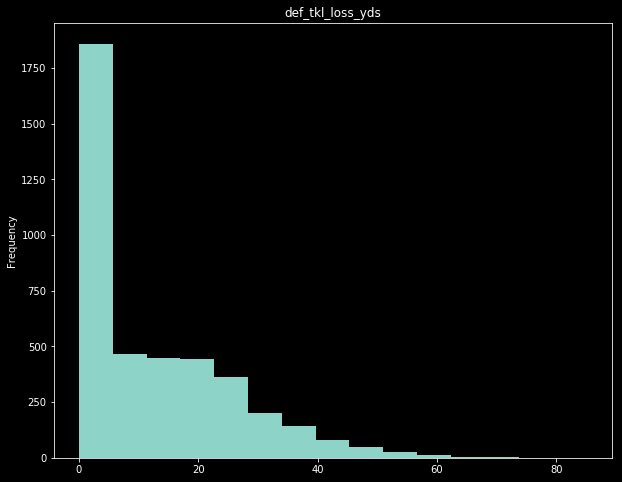

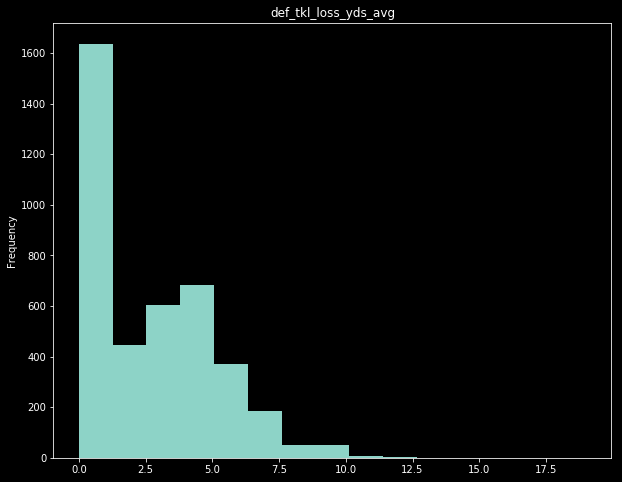

In [96]:
def_cols2 = [u'def_fumb_forced', u'def_fumb_rec', u'def_frec_yds', 
            u'def_int', u'def_int_yds', 
            u'def_misc_yds',
            u'def_pass_def', 
            u'def_qbhit', u'def_sack', u'def_sack_yds', 
            u'def_tkl_loss', u'def_tkl_loss_yds','def_tkl_loss_yds_avg'] 
for col in def_cols2:
    all_team_data[col].plot.hist( bins=15, title=col )
    plt.show()

In [114]:
def_turn = [u'def_fumb_forced', u'def_fumb_rec', u'def_int', 'def_pass_def']

print all_team_data[def_turn].corr()

print lumped_year_team_data[def_turn].sum()
print lumped_year_team_data[def_turn].corr( method='spearman' )

                 def_fumb_forced  def_fumb_rec   def_int  def_pass_def
def_fumb_forced         1.000000      0.672036  0.053738      0.066781
def_fumb_rec            0.672036      1.000000  0.051600      0.067076
def_int                 0.053738      0.051600  1.000000      0.517394
def_pass_def            0.066781      0.067076  0.517394      1.000000
def_fumb_forced     3633
def_fumb_rec        2527
def_int             3812
def_pass_def       19166
dtype: int64
                 def_fumb_forced  def_fumb_rec   def_int  def_pass_def
def_fumb_forced         1.000000      0.647637  0.022535      0.099215
def_fumb_rec            0.647637      1.000000  0.132989      0.123816
def_int                 0.022535      0.132989  1.000000      0.518457
def_pass_def            0.099215      0.123816  0.518457      1.000000


In [121]:
def_yds = [u'def_frec_yds', u'def_int_yds', u'def_misc_yds', u'def_sack_yds', u'def_tkl_loss_yds'] 

print all_team_data[def_yds].corr()

print lumped_year_team_data[def_yds].sum()
print lumped_year_team_data[def_yds].corr( method='spearman' )

                  def_frec_yds  def_int_yds  def_misc_yds  def_sack_yds  \
def_frec_yds          1.000000     0.042049     -0.015129     -0.042833   
def_int_yds           0.042049     1.000000      0.007639     -0.067463   
def_misc_yds         -0.015129     0.007639      1.000000     -0.006151   
def_sack_yds         -0.042833    -0.067463     -0.006151      1.000000   
def_tkl_loss_yds      0.012824     0.014262      0.021177     -0.457026   

                  def_tkl_loss_yds  
def_frec_yds              0.012824  
def_int_yds               0.014262  
def_misc_yds              0.021177  
def_sack_yds             -0.457026  
def_tkl_loss_yds          1.000000  
def_frec_yds        10890
def_int_yds         54724
def_misc_yds         2719
def_sack_yds       -65843
def_tkl_loss_yds    48508
dtype: int64
                  def_frec_yds  def_int_yds  def_misc_yds  def_sack_yds  \
def_frec_yds          1.000000     0.074410      0.107364     -0.144463   
def_int_yds           0.074410    

Here let's create some defense features. Unless otherwise stated, drop the columns used to make things

In [88]:
blk_stuff = ['def_xp_blk','def_punt_blk','def_fg_blk']
all_team_data['all_blk_kicks'] = all_team_data[blk_stuff].sum(axis=1)

In [90]:
scored_stuff = ['def_int_tds','def_frec_tds','def_misc_tds','def_safety']
all_team_data['all_def_scores'] = all_team_data[scored_stuff].sum(axis=1)

In [94]:
all_team_data['solo_tkl_frac'] = all_team_data['def_tkl']/all_team_data['def_tkl_contributers']

In [115]:
def_turn = [u'def_fumb_forced', u'def_fumb_rec', u'def_int', 'def_pass_def']
# Do a PCA, but keep pass def

In [99]:
# Just drop misc yds,too uncommon

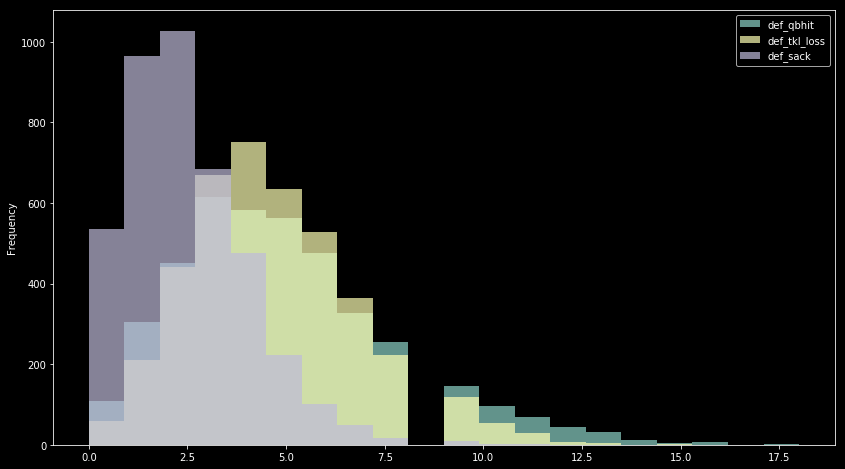

In [120]:
# Might be able to pca
all_team_data[['def_qbhit', u'def_tkl_loss','def_sack']].plot.hist(bins=20,alpha=0.7)

In [122]:
# Possibly can PCA, at least for the full year performance
def_yds = [u'def_frec_yds', u'def_int_yds', u'def_misc_yds', u'def_sack_yds', u'def_tkl_loss_yds'] 

In [124]:
junk=[ u'team', u'week', 
       u'off_fumb_forced', u'off_fumb_unforced', u'off_fumb_lost',
       u'off_fumb_rec', u'off_fumb_rec_tds', u'xp_miss', u'kickrets',
       u'kickret_yds', u'kickret_tds', u'kickret_touchback', u'pass_att',
       u'pass_cmp', u'pass_incmp', u'pass_int', u'pass_sack',
       u'pass_sack_yds', u'pass_tds', u'pass_yds', u'rush_att',
       u'rush_yds', u'rush_tds', u'rush_loss', u'rush_loss_yds',
       'kickoff_all_yds_avg', 'def_tkl_loss_yds_avg', 'kickret_yds_avg',
       'puntret_yds_avg', 'tds', 'score', 'opp_team', 'opp_score',
       'home_flag', 'away_flag', 'year']

Let's move to kicking

In [ ]:
 u'punts', u'punt_yds',
       u'punt_blk', u'punt_rets', u'punt_ret_yds', u'punt_ret_tds',
       u'kickoffs', u'kickoff_all_yds', u'kickoff_in_20',
       u'kickoff_own_recovery', u'kickoff_own_recovery_tds',
       u'kickoff_touchback', u'fg_att', u'fg_blk', u'fg_made', u'fg_miss',
       u'fg_yds', u'fg_yds_max', u'fg_miss_yds', u'fg_miss_yds_min',
       u'xp_att', u'xp_blk', u'xp_made',